In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import os
import numpy as np
import xarray as xr

In [94]:
''' Display SIC'''
def DrawSIC(data,X,Y,date):   
    
    # 投影方式,npstere; 纬度，58~90; 0度经线，逆时针旋转315度
    m = Basemap(projection='npstere',boundinglat=75,lon_0=315,resolution='l') 
    fig = plt.figure(figsize=(8,8))
    x,y = m(X,Y)  # compute map proj coordinates
    
    # plot
    cmap = plt.cm.gist_ncar
    cmap.set_bad('black')
    im = m.pcolormesh(x,y,data,cmap=cmap,shading='flat',edgecolors='None')
    # 绘制海岸线
    m.drawcoastlines()
    # 填充陆地
    m.fillcontinents(color='silver',lake_color='aqua')
    # 绘制纬线
    para=m.drawparallels(np.arange(84,85),color='blue',fontsize=14,\
                    linewidth=3,latmax=84)
    # 绘制经线
    merid=m.drawmeridians(np.arange(-180.,181.,60.),latmax=84,fontsize=14)
    # 绘制边界线
    m.drawmapboundary(fill_color='aqua')  
    
       
    from matplotlib.font_manager import FontProperties 
    font1 = FontProperties(family='times new roman', size=24)
    font2 = FontProperties(family='times new roman', size=22)
    font3 = FontProperties(family='times new roman', size=22)
    
    # add colorbar 
    cbar = m.colorbar(location='bottom',\
                      spacing='uniform')
    cbar.set_label('Sea Ice Concentration (%)',fontproperties=font1)
    lim=np.arange(0,110,10)    
    cbar.set_ticks(lim)
    cbar.ax.set_xticklabels(lim,fontproperties=font2)
    # 标注纬度
    lon=-150
    for lat in np.array([82]):
        x,y = m(lon, lat)
        plt.text(x,y,str(lat+2)[:2]+'°N',color='black',\
                 fontproperties=font3)
    # 标注经度
    lat=80
    for lon in np.arange(60,180,60):
        x,y = m(lon, lat)
        plt.text(x,y,str(lon)+'°E',color='black',\
                 fontproperties=font2)
    lat=77
    for lon in np.arange(-60,-180,-60):
        x,y = m(lon, lat)
        plt.text(x,y,str(-lon)+'°W',color='black',\
                 fontproperties=font2)    
    for lon in np.array([-178]):
        x,y = m(lon, lat)
        plt.text(x,y,str(-lon+2)+'°',color='black',\
                 fontproperties=font2)
                 
    # add date    
    import datetime as dt
    date=dt.datetime.strptime(date,'%Y%m%d')
    string = str(date.year)+'.'+str(date.month)+'.'+str(date.day)+' MODIS SIC' 
    x0,y0=m(178,69)
    plt.text(x0,y0,string,color='black',\
                 fontproperties=font3)                
    
#     plt.show()

In [73]:
''' Display SIC difference'''
def Drawdif(data,X,Y,date):   
    
    # 投影方式,npstere; 纬度，58~90; 0度经线，逆时针旋转315度
    m = Basemap(projection='npstere',boundinglat=75,lon_0=315,resolution='l') 
    fig = plt.figure(figsize=(8,8))
    x,y = m(X,Y)  # compute map proj coordinates
    
    # plot
    cmap = plt.cm.bwr
    cmap.set_bad('black')
    im = m.pcolormesh(x,y,data,cmap=cmap,shading='flat',edgecolors='None')
    # 绘制海岸线
    m.drawcoastlines()
    # 填充陆地
    m.fillcontinents(color='silver',lake_color='aqua')
    # 绘制纬线
    para=m.drawparallels(np.arange(84,85),color='blue',fontsize=14,\
                    linewidth=3,latmax=84)
    # 绘制经线
    merid=m.drawmeridians(np.arange(-180.,181.,60.),latmax=84,fontsize=14)
    # 绘制边界线
    m.drawmapboundary(fill_color='aqua')  
    
       
    from matplotlib.font_manager import FontProperties 
    font1 = FontProperties(family='times new roman', size=24)
    font2 = FontProperties(family='times new roman', size=22)
    font3 = FontProperties(family='times new roman', size=22)
    
    # add colorbar 
    cbar = m.colorbar(location='bottom',\
                      spacing='uniform',
                      extend='both')
    cbar.set_label('Sea Ice Concentration (%)',fontproperties=font1)
    lim=np.arange(-80,100,20)
    cbar.set_ticks(lim)
    cbar.ax.set_xticklabels(lim,fontproperties=font2)
    # 标注纬度
    lon=-150
    for lat in np.array([82]):
        x,y = m(lon, lat)
        plt.text(x,y,str(lat+2)[:2]+'°N',color='black',\
                 fontproperties=font3)
    # 标注经度
    lat=80
    for lon in np.arange(60,180,60):
        x,y = m(lon, lat)
        plt.text(x,y,str(lon)+'°E',color='black',\
                 fontproperties=font2)
    lat=77
    for lon in np.arange(-60,-180,-60):
        x,y = m(lon, lat)
        plt.text(x,y,str(-lon)+'°W',color='black',\
                 fontproperties=font2)    
    for lon in np.array([-178]):
        x,y = m(lon, lat)
        plt.text(x,y,str(-lon+2)+'°',color='black',\
                 fontproperties=font2)
                 
    # add date    
    import datetime as dt
    date=dt.datetime.strptime(date,'%Y%m%d')
    string = str(date.year)+'.'+str(date.month)+'.'+str(date.day)+' ASI SIC - MODIS SIC' 
    x0,y0=m(178,69)
    plt.text(x0,y0,string,color='black',\
                 fontproperties=font3)                
    
#     plt.show()

In [4]:
os.getcwd()

'C:\\Users\\kathy\\research\\Sea-ice-concentration\\p_pro'

In [5]:
os.chdir('C:\\Users\\kathy\\Downloads\\')

In [7]:
ds = xr.open_dataset('MOD_sic_regrid.nc')
ds

<xarray.Dataset>
Dimensions:     (x: 320, y: 320)
Coordinates:
    lon         (x, y) float32 ...
    lat         (x, y) float32 ...
Dimensions without coordinates: x, y
Data variables:
    sic         (x, y) float64 ...
    cloud_mask  (x, y) float64 ...
Attributes:
    regrid_method:  patch

In [10]:
sic = ds.sic.values
cloud_mask = ds.cloud_mask.values
lon = ds.lon.values
lat = ds.lat.values

In [9]:
date = '20080701'

In [86]:
sic_clear = np.ma.masked_where(cloud_mask > 0,sic)
sic_clear = np.ma.masked_where(sic_clear == 0, sic_clear)

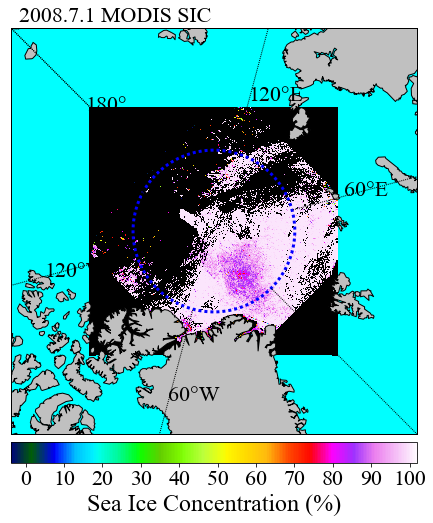

In [95]:
# DrawSIC(sic,lon,lat,date)
DrawSIC(sic_clear,lon,lat,date)


In [40]:
da = xr.open_dataset('asi_sic_80.nc')
da

<xarray.Dataset>
Dimensions:  (x: 320, y: 320)
Dimensions without coordinates: x, y
Data variables:
    lat      (x, y) float32 ...
    lon      (x, y) float32 ...
    sic      (x, y) float32 ...

In [41]:
sic_asi = da.sic.values

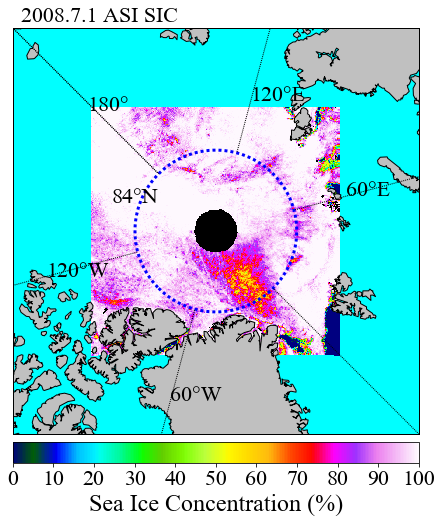

In [44]:
DrawSIC(sic_asi,lon,lat,date)

In [91]:
dif = sic_asi - sic_clear

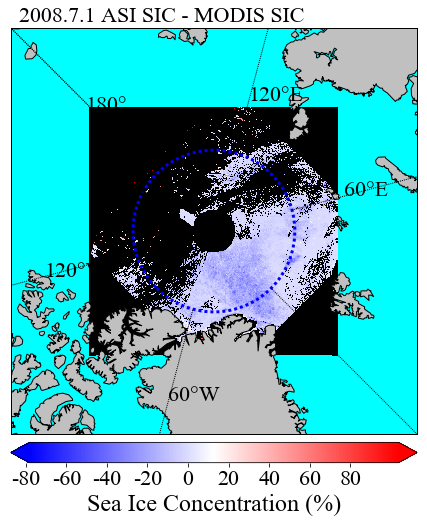

In [92]:
Drawdif(dif,lon,lat,date)

In [93]:
print(np.nanmean(dif),np.nanmean(dif[dif < 0]))
print(np.nanmedian(dif),np.nanmedian(dif[dif < 0]))

-5.506353212923745 -7.0491605112919276
96.74253845214844 -4.463862564903451


C:\Users\kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
C:\Users\kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


In [105]:
print('Mean Difference (84N, clear):',np.nanmean(dif[[lat > 84] and [dif <0]]))
print('Median Difference (84N, clear):',np.nanmedian(dif[[lat > 84] and [dif <0]]))

Mean Difference (84N, clear): -7.0491605112919276
Median Difference (84N, clear): -4.463862564903451


C:\Users\kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less
  """Entry point for launching an IPython kernel.
C:\Users\kathy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less
  


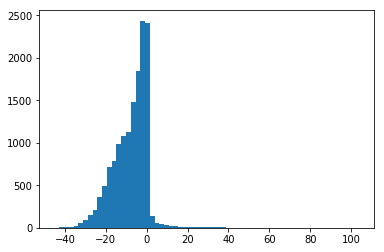

In [103]:
plt.hist(np.ma.compressed(dif[lat > 84]),bins=64);